In [3]:
#GRADIENT BOOSTING REGRESSOR MODEL FOR BULK MODULUS

import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("elastic_properties_dataset.csv")

# Drop rows with missing bulk_modulus or elastic_tensor
df_clean = df.dropna(subset=["bulk_modulus", "elastic_tensor"])

# Extract 'vrh' from bulk_modulus safely
def extract_vrh(bulk_str):
    try:
        val = ast.literal_eval(bulk_str).get('vrh')
        return float(val) if np.isfinite(val) else np.nan
    except:
        return np.nan

# Flatten the 6x6 elastic tensor safely
def flatten_elastic_tensor(tensor_str):
    try:
        raw = ast.literal_eval(tensor_str).get('raw')
        matrix = np.array(raw)
        return matrix.flatten() if matrix.shape == (6, 6) else np.full(36, np.nan)
    except:
        return np.full(36, np.nan)

# Apply feature extraction
df_clean["bulk_vrh"] = df_clean["bulk_modulus"].apply(extract_vrh)
elastic_features = np.vstack(df_clean["elastic_tensor"].apply(flatten_elastic_tensor).values)

# Filter out invalid rows
valid_mask = ~np.isnan(elastic_features).any(axis=1) & df_clean["bulk_vrh"].notna()
X = elastic_features[valid_mask]
y = df_clean.loc[valid_mask, "bulk_vrh"].values

# Remove outliers from y (1st to 99th percentile)
lower, upper = np.percentile(y, [1, 99])
inlier_mask = (y >= lower) & (y <= upper)
X = X[inlier_mask]
y = y[inlier_mask]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R² Score:", r2)


<ipython-input-3-c5f79d121a08>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["bulk_vrh"] = df_clean["bulk_modulus"].apply(extract_vrh)


Test MSE: 68.47698446241718
Test R² Score: 0.9864147708768969


In [4]:
#GRADIENT BOOSTING REGRESSOR MODEL FOR SHEAR MODULUS

import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("elastic_properties_dataset.csv")

# Drop rows with missing bulk_modulus or elastic_tensor
df_clean = df.dropna(subset=["shear_modulus", "elastic_tensor"])

# Extract 'vrh' from bulk_modulus safely
def extract_vrh(shear_str):
    try:
        val = ast.literal_eval(shear_str).get('vrh')
        return float(val) if np.isfinite(val) else np.nan
    except:
        return np.nan

# Flatten the 6x6 elastic tensor safely
def flatten_elastic_tensor(tensor_str):
    try:
        raw = ast.literal_eval(tensor_str).get('raw')
        matrix = np.array(raw)
        return matrix.flatten() if matrix.shape == (6, 6) else np.full(36, np.nan)
    except:
        return np.full(36, np.nan)

# Apply feature extraction
df_clean["shear_vrh"] = df_clean["shear_modulus"].apply(extract_vrh)
elastic_features = np.vstack(df_clean["elastic_tensor"].apply(flatten_elastic_tensor).values)

# Filter out invalid rows
valid_mask = ~np.isnan(elastic_features).any(axis=1) & df_clean["shear_vrh"].notna()
X = elastic_features[valid_mask]
y = df_clean.loc[valid_mask, "shear_vrh"].values

# Remove outliers from y (1st to 99th percentile)
lower, upper = np.percentile(y, [1, 99])
inlier_mask = (y >= lower) & (y <= upper)
X = X[inlier_mask]
y = y[inlier_mask]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R² Score:", r2)


<ipython-input-4-29f5dd849af1>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shear_vrh"] = df_clean["shear_modulus"].apply(extract_vrh)


Test MSE: 228.8289159661968
Test R² Score: 0.90370994642878


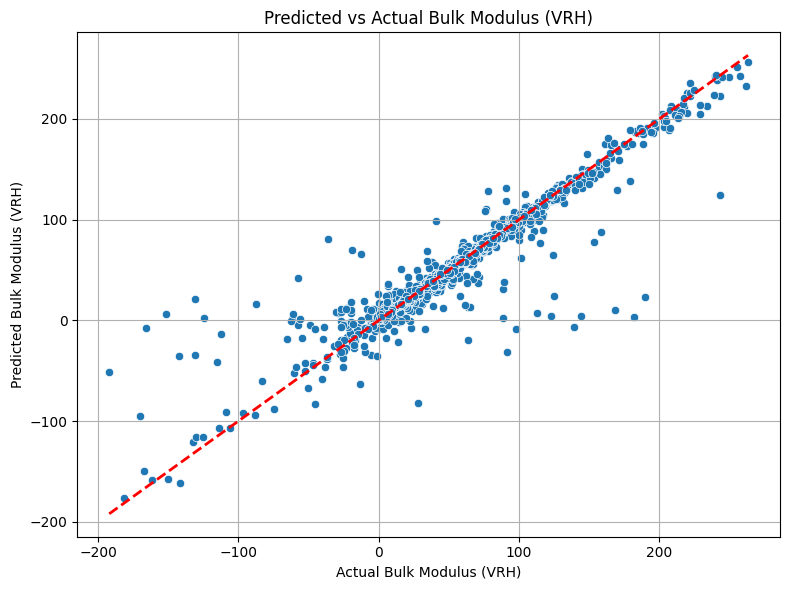

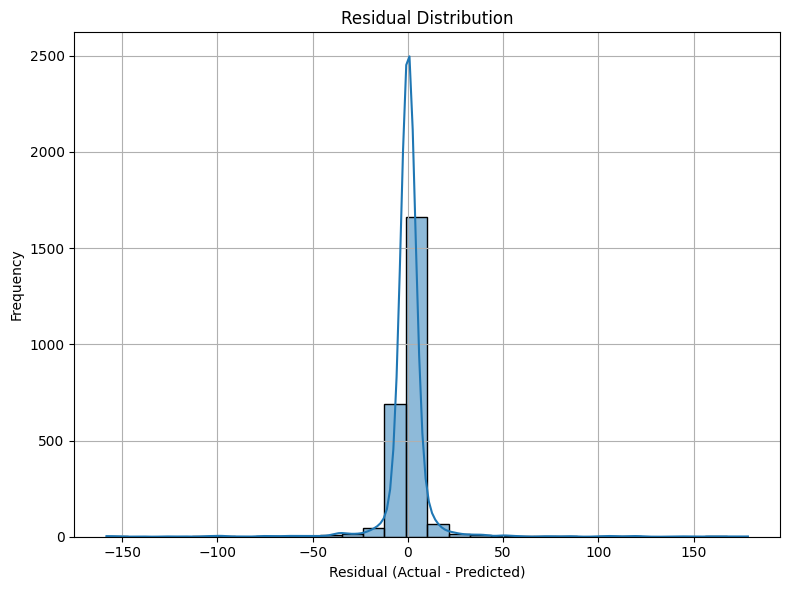

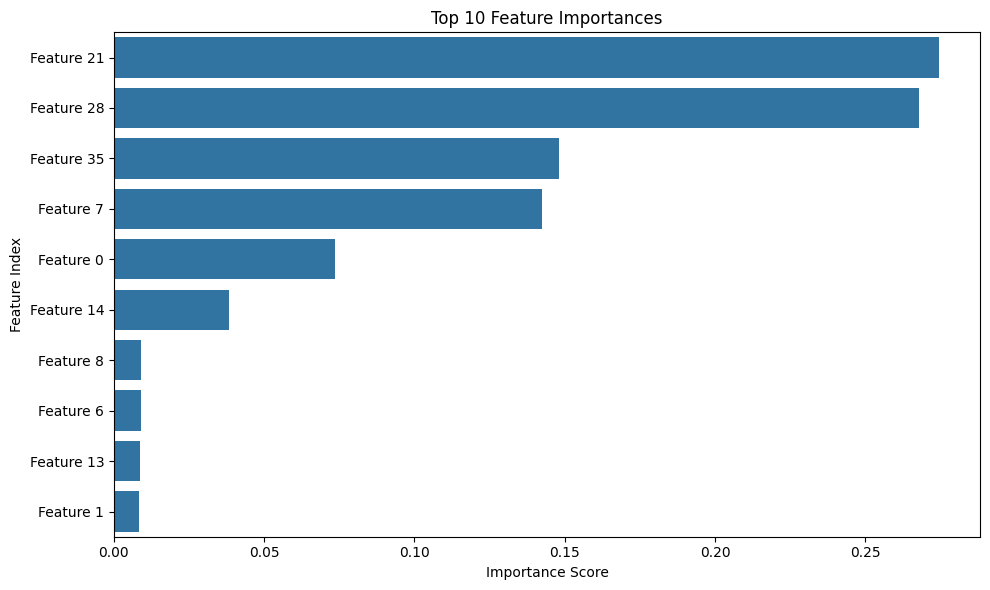

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual Bulk Modulus (VRH)")
plt.ylabel("Predicted Bulk Modulus (VRH)")
plt.title("Predicted vs Actual Bulk Modulus (VRH)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10  # show top 10 important features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices[:top_n]], y=[f'Feature {i}' for i in indices[:top_n]])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature Index")
plt.tight_layout()
plt.show()
